**import the package file**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### find the categorical and numerical columns

In [4]:
num_columns = df.select_dtypes(exclude = "object").columns
num_columns = list(num_columns)

In [5]:
cate_columns = df.select_dtypes(include="object").columns
cate_columns = list(cate_columns)

**numerical  columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']**

**categorical columns = [Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status]**

***total number of columns are 13 where***

***5 numerical columns and 8 categorical columns***

In [6]:
num_columns, cate_columns

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

**find the total number of missing values**

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Here columns = ['Gender', 'Depenedents','Married', 'self_employed','LoanAmount','Loan_Amount_Term', 'Credit History'] contains the missing values**

**total 614 rows and 13 columns**

In [8]:
df.shape

(614, 13)

In [9]:
# df_clean = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [10]:
for col in cate_columns:
    fill_value = df[col].mode()[0]
    df[col] = df[col].fillna(fill_value)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Target Variable
- here target variable is Loan_status
- it is categorical variable, now find out its frequency table, percentage, distribution and barplot

**frequency table of a Loan_status**

In [12]:
Loan_frequency_table = df['Loan_Status'].value_counts()
Loan_frequency_table

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**create frequency table of Loan Status**

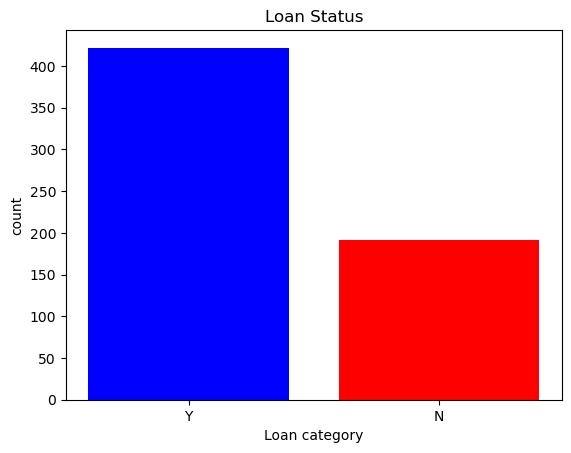

In [13]:
plt.bar(Loan_frequency_table.index, Loan_frequency_table.values, color =['blue','red'] )
plt.title("Loan Status")
plt.xlabel("Loan category")
plt.ylabel("count")
plt.show()

**normalize the Loan_Status columns to find the percentage**

In [14]:
loan_percentage = df['Loan_Status'].value_counts(normalize = True)*100
loan_percentage

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

**Gender Variable Analysis**

In [20]:
Gender_values = df.value_counts('Gender').reset_index()
Gender_values

,Gender,count
0,Male,502
1,Female,112


<BarContainer object of 2 artists>

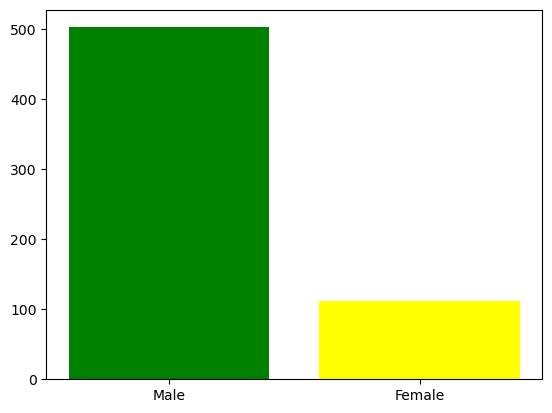

In [23]:
plt.bar('Gender','count', data = Gender_values, color = ['Green','Yellow'])

Text(0.5, 1.0, 'Gender')

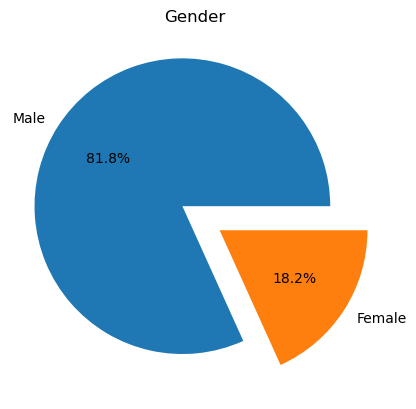

In [48]:
Gender_value = df.value_counts('Gender', normalize= True)
plt.pie( Gender_value.values,labels = Gender_value.index, autopct='%1.1f%%',explode = [0.1,0.2] )
plt.title("Gender")

**Married variable Analysis**

In [26]:
married_value = df.value_counts('Married').reset_index()
married_value

,Married,count
0,Yes,401
1,No,213


<BarContainer object of 2 artists>

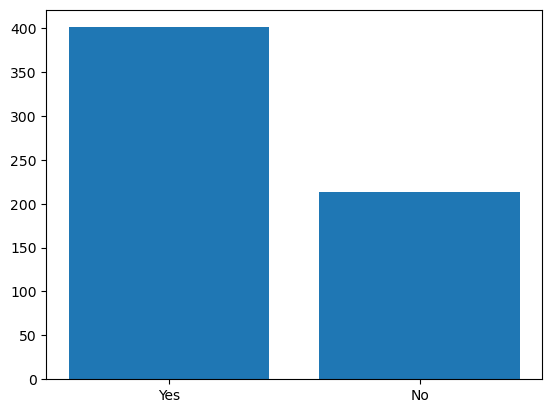

In [28]:
plt.bar('Married', 'count', data = married_value)

Text(0.5, 1.0, 'Married')

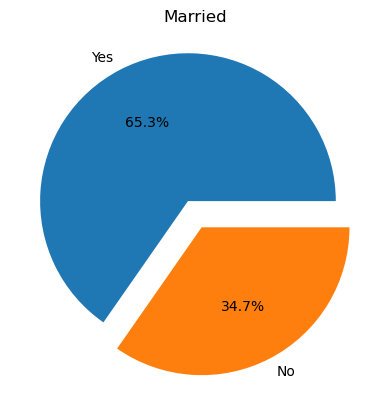

In [43]:
married_value = df.value_counts('Married', normalize= True)
plt.pie( married_value.values,labels = married_value.index, autopct='%1.1f%%',explode = [0.1,0.1] )
plt.title("Married")

**Analysis on "Self employed"**

<BarContainer object of 2 artists>

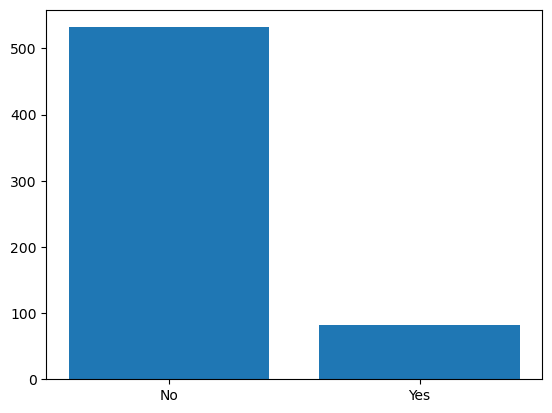

In [56]:
self_employed_values = df.value_counts('Self_Employed').reset_index()
plt.bar("Self_Employed","count", data = self_employed_values)

**Analysis on Credit History**

In [63]:
credit_history_values = df.value_counts('Credit_History').reset_index()
credit_history_values

,Credit_History,count
0,1.0,475
1,0.0,89


<BarContainer object of 2 artists>

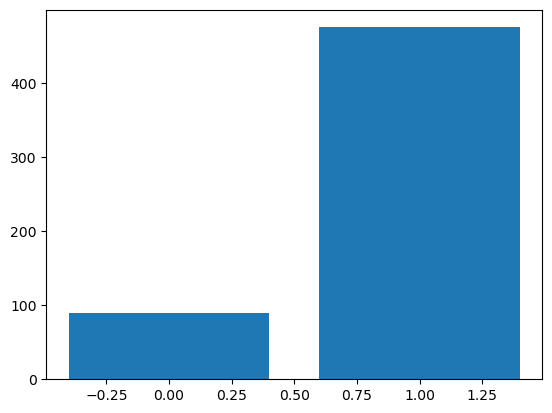

In [64]:
plt.bar("Credit_History","count", data = credit_history_values)

**Anayslis on Dependent variable**

In [67]:
dependent_variable_values = df.value_counts('Dependents').reset_index()
dependent_variable_values

,Dependents,count
0,0,360
1,1,102
2,2,101
3,3+,51


<BarContainer object of 4 artists>

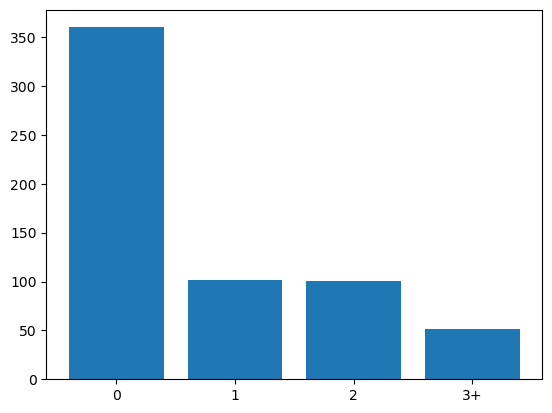

In [68]:
plt.bar('Dependents','count', data= dependent_variable_values)

**Analysis on Education variables**

In [71]:
education_values = df.value_counts('Education').reset_index()
education_values

,Education,count
0,Graduate,480
1,Not Graduate,134


<BarContainer object of 2 artists>

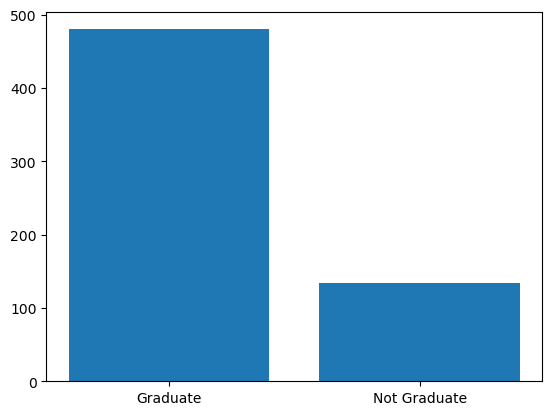

In [72]:
plt.bar("Education","count", data= education_values)

In [76]:
property_area_values = df.value_counts('Property_Area').reset_index()
property_area_values

,Property_Area,count
0,Semiurban,233
1,Urban,202
2,Rural,179


<BarContainer object of 3 artists>

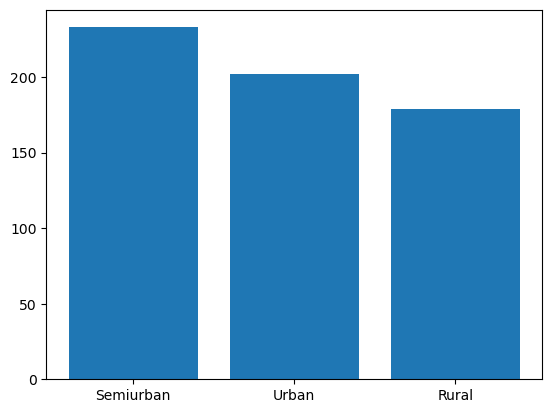

In [77]:
plt.bar('Property_Area','count', data = property_area_values)

**ApplicantIncome distribution**

C:\Users\panka\AppData\Local\Temp\ipykernel_10496\3551720842.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'] )


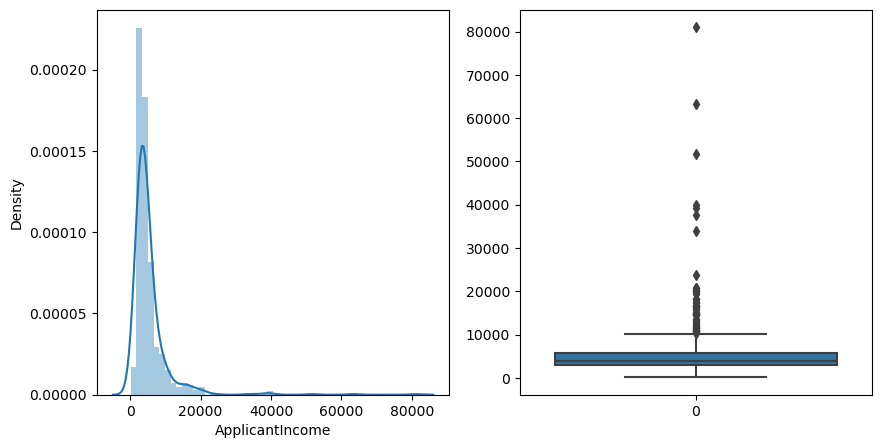

In [96]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(df['ApplicantIncome'])
plt.show()


**Analysis on CoapplicantIncome distribution**

C:\Users\panka\AppData\Local\Temp\ipykernel_10496\1205292151.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'] )


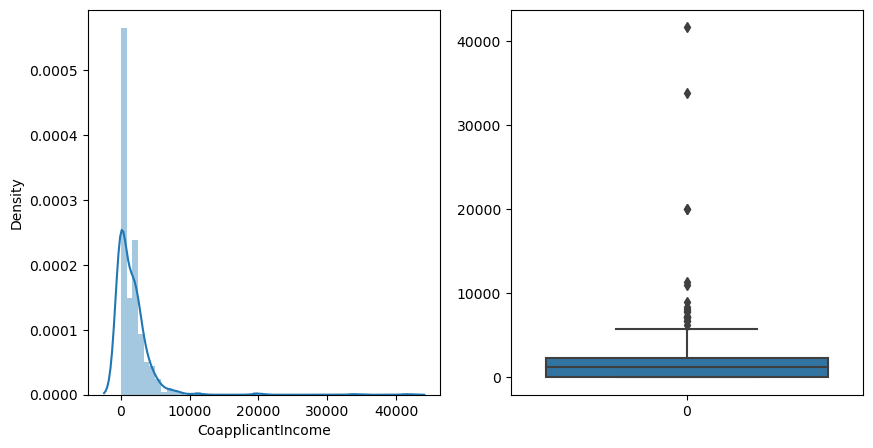

In [102]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'] )
plt.subplot(1,2,2)
sns.boxplot(df['CoapplicantIncome'])
plt.show()

**Analysis on Loan Amount**

C:\Users\panka\AppData\Local\Temp\ipykernel_10496\3474748752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'] )


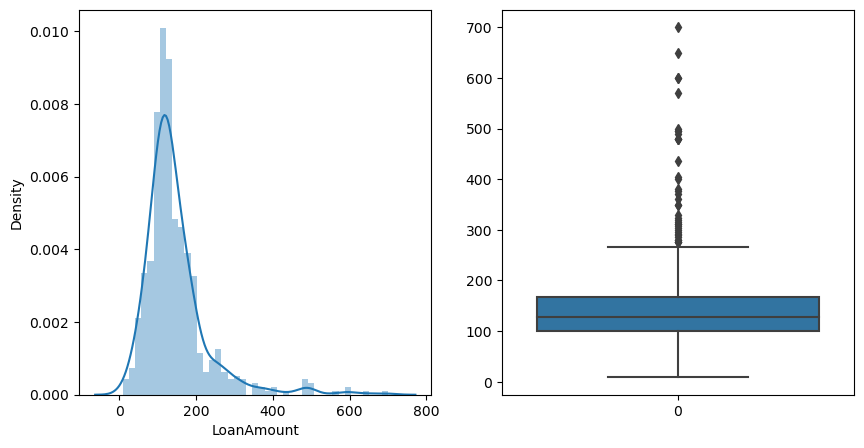

In [103]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'] )
plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])
plt.show()

**Analysis on LoanAmountTerm**

C:\Users\panka\AppData\Local\Temp\ipykernel_10496\2987360617.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'] )


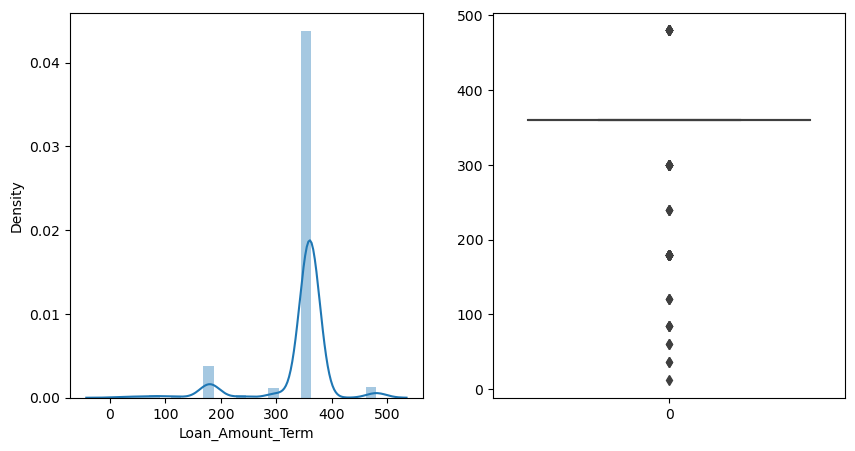

In [104]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['Loan_Amount_Term'] )
plt.subplot(1,2,2)
sns.boxplot(df['Loan_Amount_Term'])
plt.show()